In [426]:
import pandas as pd
import numpy as np

In [427]:
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [428]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Reading the dataset

In [429]:
df = pd.read_csv('parkinson.csv')
df.head().T

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284
MDVP:Jitter(Abs),7e-05,8e-05,9e-05,9e-05,0.00011
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


## Renaming the columns

In [430]:
df.columns = ['Recording_Num','VF_Avg','VF_H','VF_L','Jitter(%)','Jitter_Abs','RAP','PPQ','DDP','Shimmer','Shimmer_dB',
              'Shimmer_APQ3','Shimmer_APQ5','APQ','Shimmer_DDA','NHR','HNR','Status','RPDE','DFA','NFF_1','NFF_2','D2','PPE']

In [431]:
df.shape

(195, 24)

In [432]:
df.dtypes

Recording_Num     object
VF_Avg           float64
VF_H             float64
VF_L             float64
Jitter(%)        float64
Jitter_Abs       float64
RAP              float64
PPQ              float64
DDP              float64
Shimmer          float64
Shimmer_dB       float64
Shimmer_APQ3     float64
Shimmer_APQ5     float64
APQ              float64
Shimmer_DDA      float64
NHR              float64
HNR              float64
Status             int64
RPDE             float64
DFA              float64
NFF_1            float64
NFF_2            float64
D2               float64
PPE              float64
dtype: object

In [433]:
df.describe()

,VF_Avg,VF_H,VF_L,Jitter(%),Jitter_Abs,RAP,PPQ,DDP,Shimmer,Shimmer_dB,...,Shimmer_DDA,NHR,HNR,Status,RPDE,DFA,NFF_1,NFF_2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [434]:
df.Status.value_counts()/len(df)

1    0.753846
0    0.246154
Name: Status, dtype: float64

In [435]:
df.isnull().sum()

Recording_Num    0
VF_Avg           0
VF_H             0
VF_L             0
Jitter(%)        0
Jitter_Abs       0
RAP              0
PPQ              0
DDP              0
Shimmer          0
Shimmer_dB       0
Shimmer_APQ3     0
Shimmer_APQ5     0
APQ              0
Shimmer_DDA      0
NHR              0
HNR              0
Status           0
RPDE             0
DFA              0
NFF_1            0
NFF_2            0
D2               0
PPE              0
dtype: int64

- There are no missing values in the data.

In [436]:
df = df.drop('Recording_Num',axis = 1)

In [437]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [438]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/len(df)

VF_Avg          0.000000
VF_H            0.056410
VF_L            0.046154
Jitter(%)       0.071795
Jitter_Abs      0.030769
RAP             0.071795
PPQ             0.076923
DDP             0.071795
Shimmer         0.041026
Shimmer_dB      0.051282
Shimmer_APQ3    0.030769
Shimmer_APQ5    0.066667
APQ             0.061538
Shimmer_DDA     0.030769
NHR             0.097436
HNR             0.015385
Status          0.246154
RPDE            0.000000
DFA             0.000000
NFF_1           0.020513
NFF_2           0.010256
D2              0.005128
PPE             0.025641
dtype: float64

- We have less than 8% skewness in the data which is allowable.

In [439]:
from scipy.stats import skew
dataskew = df.apply(lambda x: skew(x.dropna()))
dataskew

VF_Avg          0.587176
VF_H            2.522549
VF_L            1.207966
Jitter(%)       3.061165
Jitter_Abs      2.628650
RAP             3.334801
PPQ             3.050196
DDP             3.336141
Shimmer         1.653634
Shimmer_dB      1.983976
Shimmer_APQ3    1.568392
Shimmer_APQ5    1.784831
APQ             2.597864
Shimmer_DDA     1.568433
NHR             4.188173
HNR            -0.510353
Status         -1.178571
RPDE           -0.142297
DFA            -0.032958
NFF_1           0.428808
NFF_2           0.143317
D2              0.427066
PPE             0.791343
dtype: float64

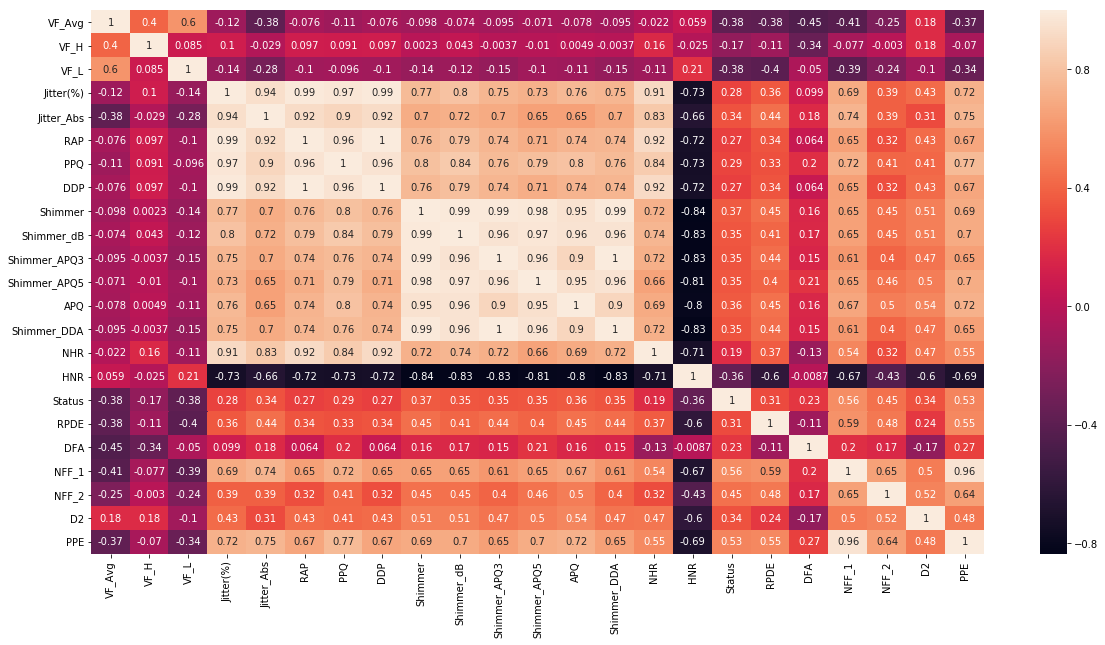

In [440]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

- We see that there are many columns which are very much corelated with each other. We need to reduce this.
- I am taking the average of those columns which are highly corelated with each other.

## Taking the average of the columns related to shimmer

In [441]:
shimmer = df.iloc[:,8:14]

In [442]:
df['mean_shimmer'] = shimmer.mean(axis = 1)

In [443]:
df = df.drop(['Shimmer','Shimmer_dB','Shimmer_APQ3','Shimmer_APQ5','APQ','Shimmer_DDA'],axis = 1)
df.head()

,VF_Avg,VF_H,VF_L,Jitter(%),Jitter_Abs,RAP,PPQ,DDP,NHR,HNR,Status,RPDE,DFA,NFF_1,NFF_2,D2,PPE,mean_shimmer
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0.103003
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0.150262
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0.119847
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.127773
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0.146792


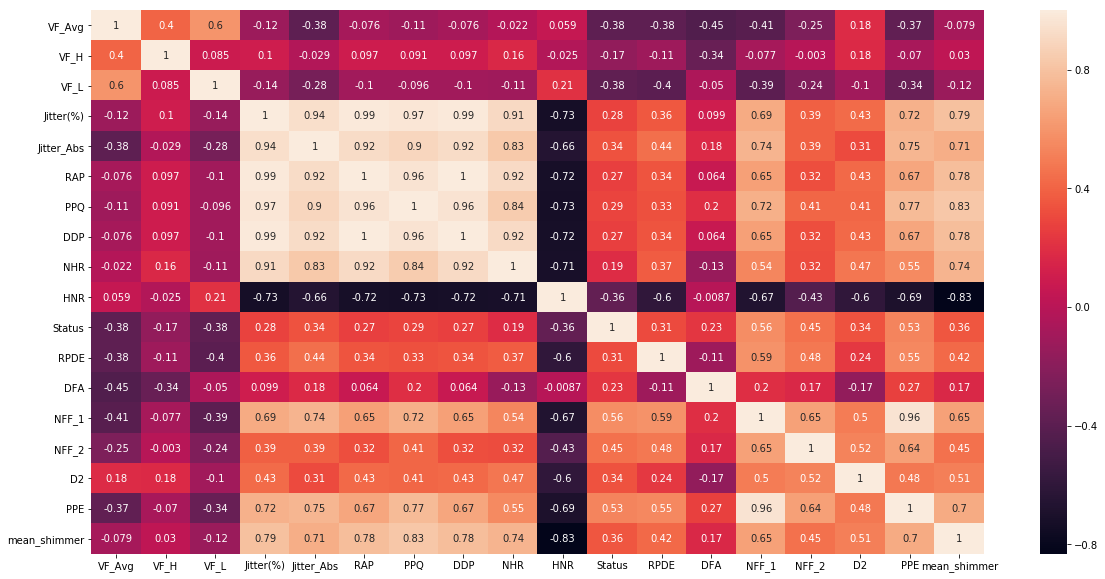

In [444]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

## Taking the average of the columns related to Jitter

In [445]:
jitter = df.iloc[:,3:8]

In [446]:
df['mean_jitter'] = jitter.mean(axis = 1)
df.head()

,VF_Avg,VF_H,VF_L,Jitter(%),Jitter_Abs,RAP,PPQ,DDP,NHR,HNR,Status,RPDE,DFA,NFF_1,NFF_2,D2,PPE,mean_shimmer,mean_jitter
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0.103003,0.005648
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0.150262,0.007062
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0.119847,0.008034
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.127773,0.007422
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0.146792,0.009648


In [447]:
df = df.drop(['Jitter(%)','Jitter_Abs','RAP','PPQ','DDP'],axis = 1)
df.head()

,VF_Avg,VF_H,VF_L,NHR,HNR,Status,RPDE,DFA,NFF_1,NFF_2,D2,PPE,mean_shimmer,mean_jitter
0,119.992,157.302,74.997,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0.103003,0.005648
1,122.400,148.650,113.819,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0.150262,0.007062
2,116.682,131.111,111.555,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0.119847,0.008034
3,116.676,137.871,111.366,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.127773,0.007422
4,116.014,141.781,110.655,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0.146792,0.009648


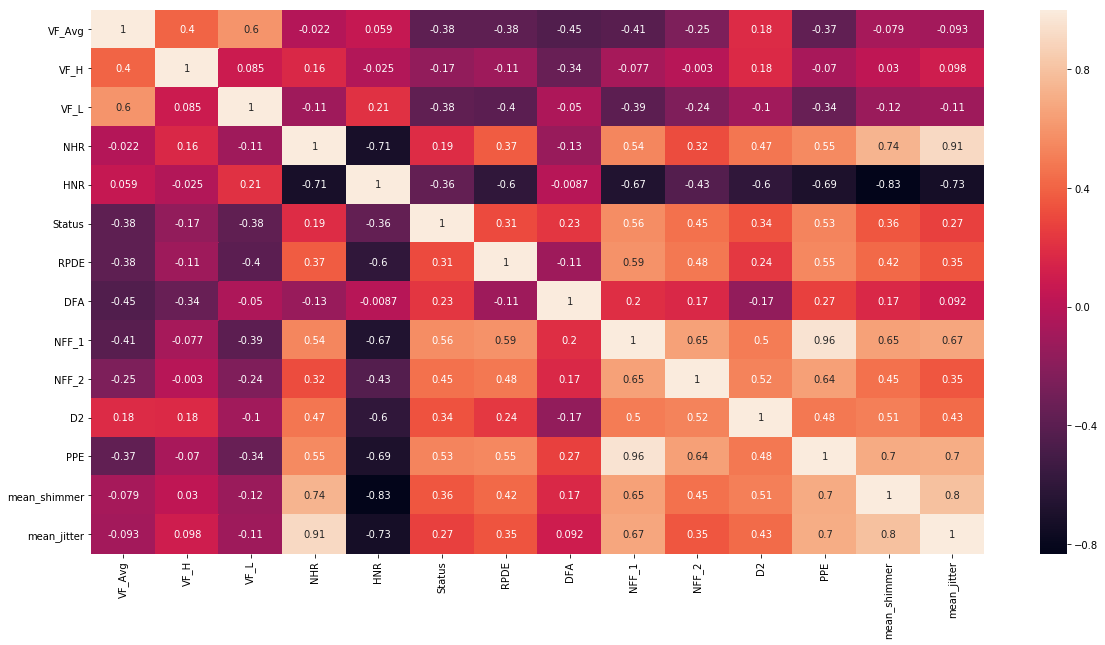

In [448]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

- So finally we have reduced the inter corelations among the attribute by doing feature engineering(averaging the columns).

# Model Building

## Normalizing the data(x)

In [449]:
y = df.loc[:,['Status']]
x = df.drop('Status',axis = 1)

In [450]:
x = ((x - x.mean())/(x.max() - x.min()))
x.head()

,VF_Avg,VF_H,VF_L,NHR,HNR,RPDE,DFA,NFF_1,NFF_2,D2,PPE,mean_shimmer,mean_jitter
0,-0.199314,-0.081250,-0.237934,-0.008712,-0.034665,-0.195418,0.387186,0.157544,0.089982,-0.035760,0.161760,0.115932,0.041082
1,-0.185296,-0.098911,-0.014426,-0.017688,-0.113833,-0.093743,0.404062,0.290945,0.245554,0.046724,0.335777,0.279117,0.095854
2,-0.218584,-0.134713,-0.027460,-0.037423,-0.050190,-0.160158,0.427037,0.224413,0.190588,-0.017602,0.261133,0.174092,0.133505
3,-0.218619,-0.120914,-0.028548,-0.036022,-0.050474,-0.148319,0.402922,0.283296,0.242305,0.010556,0.336400,0.201464,0.109799
4,-0.222473,-0.112932,-0.032641,-0.022845,-0.090912,-0.189415,0.419850,0.350140,0.018015,-0.022086,0.422062,0.267135,0.196025


In [451]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (136, 13)
x_test  (59, 13)
y_train  (136, 1)
y_test  (59, 1)


In [452]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [453]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
GNBlearn = gnb.fit(x_train, y_train)
y_pred = GNBlearn.predict(x_test)

print("1. Accuracy: ", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()


print("2. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

1. Accuracy:  81.35593220338984%

2. Confusion Matrix: 
[[13  0]
 [11 35]]


In [454]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        13
           1       1.00      0.76      0.86        46

   micro avg       0.81      0.81      0.81        59
   macro avg       0.77      0.88      0.78        59
weighted avg       0.90      0.81      0.83        59



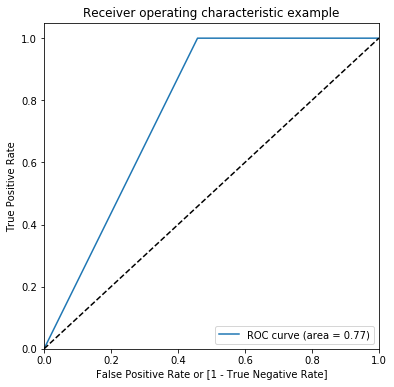

(array([0.        , 0.45833333, 1.        ]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [455]:
draw_roc(y_pred, y_test)

In [456]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=21)
NNHlearn = NNH.fit(x_train, y_train)
y_pred = NNHlearn.predict(x_test)

print("1. Accuracy: ", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()


print("2. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

1. Accuracy:  86.4406779661017%

2. Confusion Matrix: 
[[ 5  8]
 [ 0 46]]


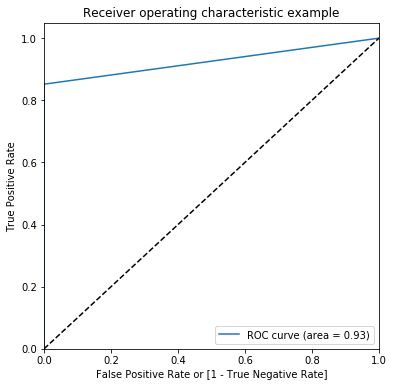

(array([0., 0., 1.]),
 array([0.        , 0.85185185, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [457]:
draw_roc(y_pred, y_test)

In [458]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.85      1.00      0.92        46

   micro avg       0.86      0.86      0.86        59
   macro avg       0.93      0.69      0.74        59
weighted avg       0.88      0.86      0.84        59



In [459]:
from sklearn.linear_model import LogisticRegression

In [460]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)

0.9152542372881356


In [461]:
test_pred = model.predict(x_test)
print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.92      0.98      0.95        46

   micro avg       0.92      0.92      0.92        59
   macro avg       0.91      0.84      0.86        59
weighted avg       0.91      0.92      0.91        59

[[ 9  4]
 [ 1 45]]


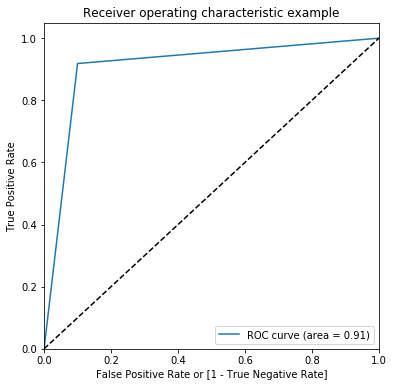

(array([0. , 0.1, 1. ]),
 array([0.        , 0.91836735, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [462]:
draw_roc(test_pred, y_test)

# Out of all the above models built, i am choosing the logistic regression model since it has given a pretty much high accuracy and precision among ather 2 models and also the area under the curve(AUC) is highest for the logistic regression model.

## Bagging and Boosting

- Optimising the above model using boosting technique

In [463]:
KNN = KNeighborsClassifier()
lg = LogisticRegression()

In [473]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=lg, n_estimators=100, learning_rate=0.3, random_state=1)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(x_train, y_train)
test_pred = abcl.predict(x_test)
abcl.score(x_test , y_test)

0.9322033898305084

- Optimising using adaBoosting technique

In [412]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator = lg,n_estimators=100, max_samples=.50 ,  oob_score=True , random_state=1)#oob means out of bag

bgcl = bgcl.fit(x, y)
print(bgcl.oob_score_)

0.8461538461538461


# By optimising, the accuracy is improved using adaBoosting technique. Here, i have considered learning rate as 0.3 for which i am achieving the highest accuracy as 93.22%.

In [405]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(NNH, x, y, cv=5)

print()
for i in range(5):
    print("Fold-" + str(i + 1) + ":", "%0.2f" % score[i])
print()
print("Mean: %0.2f" % score.mean())
print("Accuration: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Fold-1: 0.82
Fold-2: 0.80
Fold-3: 0.95
Fold-4: 0.76
Fold-5: 0.76

Mean: 0.82
Accuration: 0.82 (+/- 0.14)


In [406]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(gnb, x, y, cv=5)

print()
for i in range(5):
    print("Fold-" + str(i + 1) + ":", "%0.2f" % score[i])
print()
print("Mean: %0.2f" % score.mean())
print("Accuration: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Fold-1: 0.80
Fold-2: 0.80
Fold-3: 0.74
Fold-4: 0.66
Fold-5: 0.61

Mean: 0.72
Accuration: 0.72 (+/- 0.16)


In [407]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lg, x, y, cv=10)

print()
for i in range(
    5):
    print("Fold-" + str(i + 1) + ":", "%0.2f" % score[i])
print()
print("Mean: %0.2f" % score.mean())
print("Accuration: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Fold-1: 1.00
Fold-2: 1.00
Fold-3: 0.75
Fold-4: 0.85
Fold-5: 1.00

Mean: 0.83
Accuration: 0.83 (+/- 0.24)


# So by using the adaBoosting technique and optimising the logistic regression model we are getting a pretty goood accuracy with the data and also by doing cross validation, we are getting good score for each fold as seen above.

# Final Model using Adaptive Boosting technique and Logistic regression as the base_estimator

In [475]:
data = x.join(y)

In [481]:
values = data.values

n_iterations = 50        # Number of bootstrap samples to create
n_size = int(len(data) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree =  AdaBoostClassifier(base_estimator=lg, n_estimators=100, random_state=1)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test)

	stats.append(score)

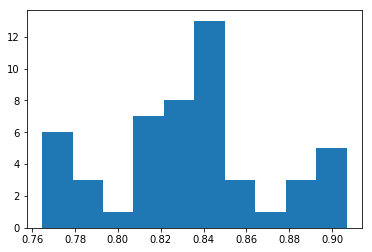

95.0 confidence interval 76.6% and 90.3%


In [483]:
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                            # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))